## Import packages

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf

## Load data

In [2]:
tam_train_df =  pd.read_csv('/kaggle/input/naacl-human-ai/tam_training_data_hum_ai.csv')
mal_train_df =  pd.read_csv('/kaggle/input/naacl-human-ai/mal_training_data_hum_ai.csv')
tam_pred_label_df =  pd.read_csv('/kaggle/input/naacl-human-ai/RATHAN_tamil_run1_pred_labels.tsv',sep = '\t')
mal_pred_label_df =  pd.read_csv('/kaggle/input/naacl-human-ai/RATHAN_malayalam_run1_pred_labels.tsv',sep = '\t')
tam_true_label_df =  pd.read_csv('/kaggle/input/naacl-human-ai/tam_test_data_hum_ai_true_labeled.csv')
mal_true_label_df =  pd.read_csv('/kaggle/input/naacl-human-ai/mal_test_data_hum_ai_true_labeled.csv')

## Distribution of labels

### Train

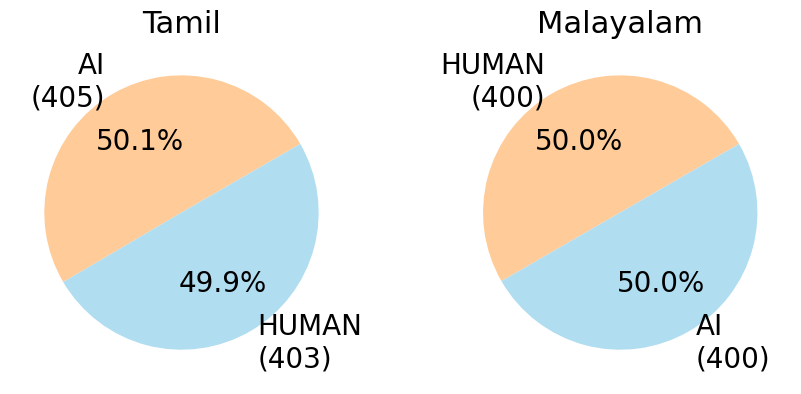

In [3]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 4))

# Tamil dataset plot
tam_human_ai_counts = tam_train_df['LABEL'].value_counts()
labels = [f'{index}\n({value:,})' for index, value in zip(tam_human_ai_counts.index, tam_human_ai_counts.values)]
ax1.pie(tam_human_ai_counts.values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, labeldistance=1.1, startangle=30, colors=['#FFCC99', '#B1DDF0'])
ax1.set_title('Tamil', fontsize=22)

# Malayalam dataset plot 
mal_human_ai_counts = mal_train_df['LABEL'].value_counts()
labels = [f'{index}\n({value:,})' for index, value in zip(mal_human_ai_counts.index, mal_human_ai_counts.values)]
ax2.pie(mal_human_ai_counts.values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, labeldistance=1.1, startangle=30, colors=['#FFCC99', '#B1DDF0'])
ax2.set_title('Malayalam', fontsize=22)

plt.tight_layout()
plt.show()

### Test

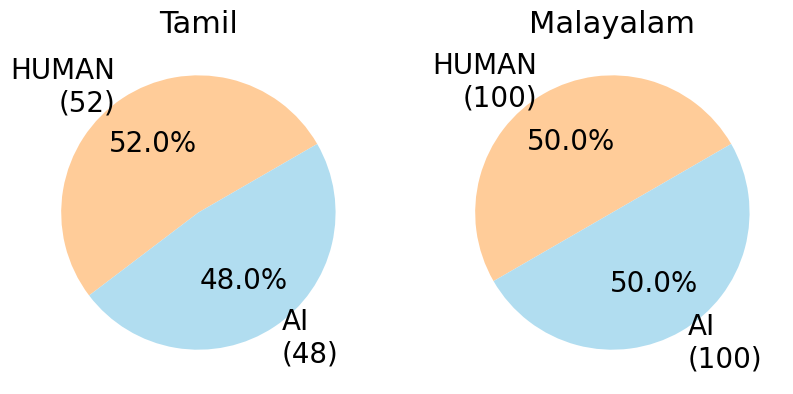

In [4]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 4))

# Tamil dataset plot
tam_human_ai_counts = tam_true_label_df['Label'].value_counts()
labels = [f'{index}\n({value:,})' for index, value in zip(tam_human_ai_counts.index, tam_human_ai_counts.values)]
ax1.pie(tam_human_ai_counts.values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, labeldistance=1.1, startangle=30, colors=['#FFCC99', '#B1DDF0'])
ax1.set_title('Tamil', fontsize=22)

# Malayalam dataset plot 
mal_human_ai_counts = mal_true_label_df['Label'].value_counts()
labels = [f'{index}\n({value:,})' for index, value in zip(mal_human_ai_counts.index, mal_human_ai_counts.values)]
ax2.pie(mal_human_ai_counts.values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, labeldistance=1.1, startangle=30, colors=['#FFCC99', '#B1DDF0'])
ax2.set_title('Malayalam', fontsize=22)

plt.tight_layout()
plt.show()

### Ensemble 

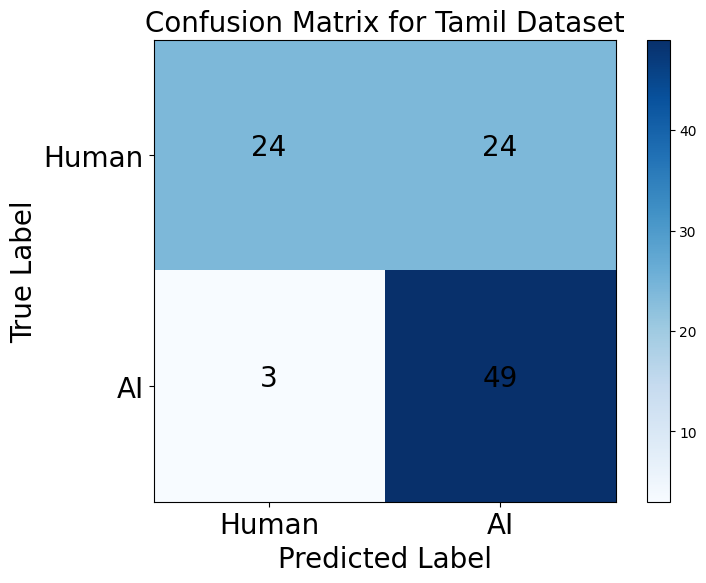


Classification Report:
              precision    recall  f1-score   support

          AI       0.89      0.50      0.64        48
       HUMAN       0.67      0.94      0.78        52

    accuracy                           0.73       100
   macro avg       0.78      0.72      0.71       100
weighted avg       0.78      0.73      0.71       100



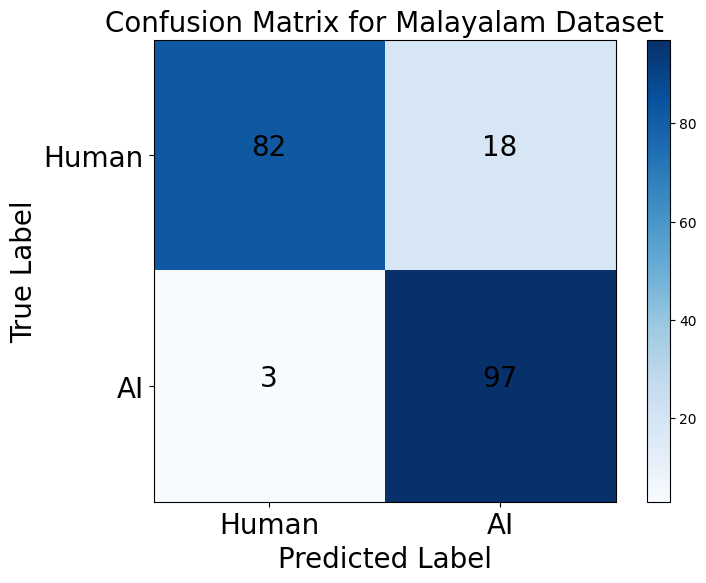


Classification Report:
              precision    recall  f1-score   support

          AI       0.96      0.82      0.89       100
       HUMAN       0.84      0.97      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



In [5]:
# Convert predictions and true labels to numpy arrays
y_pred = tam_pred_label_df['LABEL'].values
y_true = tam_true_label_df['Label'].values

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tamil Dataset', fontsize=20)
plt.colorbar()
labels = ['Human', 'AI']
plt.xticks([0, 1], labels, fontsize=20)
plt.yticks([0, 1], labels, fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)

# Add text annotations to confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', fontsize=20)

plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

###########################################################################################

# Convert predictions and true labels to numpy arrays
y_pred = mal_pred_label_df['LABEL'].values
y_true = mal_true_label_df['Label'].values

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Malayalam Dataset', fontsize=20)
plt.colorbar()
labels = ['Human', 'AI']
plt.xticks([0, 1], labels, fontsize=20)
plt.yticks([0, 1], labels, fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)

# Add text annotations to confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', fontsize=20)

plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))